<a href="https://colab.research.google.com/github/Baeltor/PCD/blob/main/Notebooks/%20Visualizaci%C3%B3n_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> <h1> Visualización 2 </h1> </center>

___
* Se abordará dos librerías importantes de visualización con algunos ejemplos de custimozación

`plotly`

`seaborn`



In [73]:
#pip install plotly
#pip install seaborn

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# `Seaborn`

Seaborn es una biblioteca para crear gráficos estadísticos en Python. Se basa en matplotlib y se integra estrechamente con las estructuras de datos de pandas.

Seaborn le ayuda a explorar y comprender sus datos. Sus funciones de representación gráfica operan en marcos de datos y matrices que contienen conjuntos de datos completos y realizan internamente el mapeo semántico y la agregación estadística necesarios para producir gráficos informativos. Su API declarativa orientada a conjuntos de datos le permite centrarse en lo que significan los diferentes elementos de sus gráficos, en lugar de en los detalles de cómo dibujarlos.

In [77]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


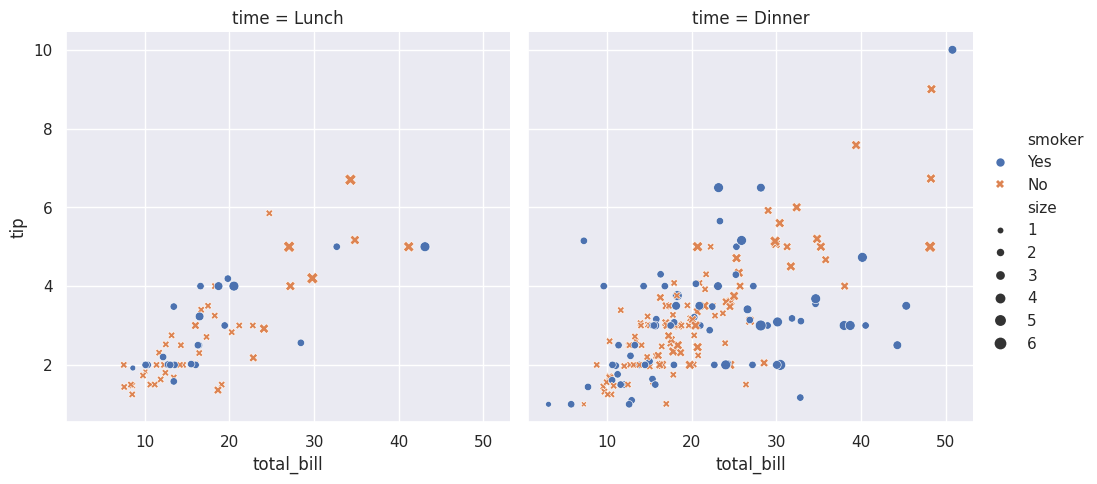

In [94]:
sns.set_theme()

# algunos datasets contenidos
tips = sns.load_dataset("tips")

# una visualización sencilla
sns.relplot(
    data=tips,
    x="total_bill",
    y="tip",
    col="time",
    hue="smoker",
    style="smoker",
    size="size",
)

### Una API de alto nivel para gráficos estadísticos
No existe una mejor manera universal de visualizar datos. Diferentes preguntas se responden mejor con diferentes gráficos. Seaborn facilita el cambio entre diferentes representaciones visuales mediante el uso de una API consistente orientada a conjuntos de datos.

La función `relplot()` se llama así porque está diseñada para visualizar muchas relaciones estadísticas diferentes. Si bien los gráficos de dispersión suelen ser efectivos, las relaciones en las que una variable representa una medida de tiempo se representan mejor con una línea. La función `relplot()` tiene un parámetro de tipo conveniente que le permite cambiar fácilmente a esta representación alternativa:

In [96]:
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
843,sacc,T2,300,3.2,33.281734
844,sacc,T2,300,6.4,27.583979
845,sacc,T2,300,12.8,28.511530
846,sacc,T2,300,25.6,27.009804


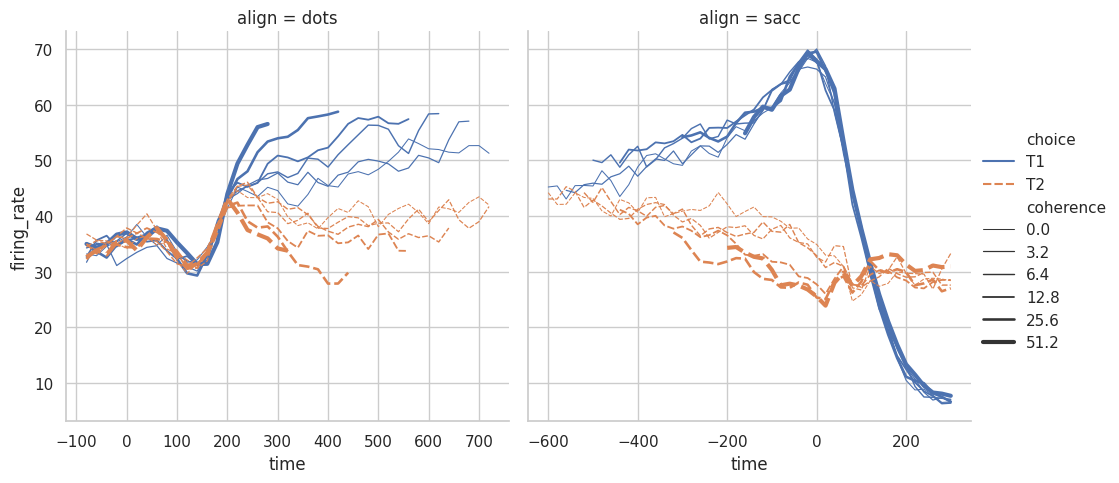

In [104]:
dots = sns.load_dataset("dots")
sns.set_theme(style="whitegrid")
sns.relplot(
    data=dots,
    kind="line",
    x="time",
    y="firing_rate",
    col="align",
    hue="choice",
    size="coherence",
    style="choice",
    facet_kws=dict(sharex=False),
)

* Estimación estadística

A menudo, nos interesa el valor promedio de una variable en función de otras variables. Muchas funciones de Seaborn realizarán automáticamente la estimación estadística necesaria para responder a estas preguntas:

In [100]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367


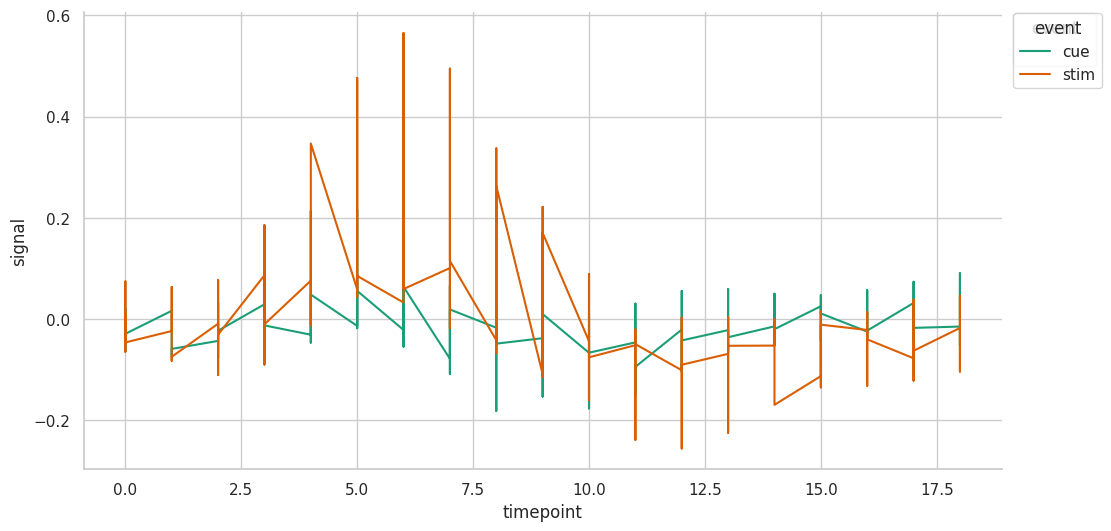

In [101]:
# @title timepoint vs signal

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timepoint']
  ys = series['signal']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = fmri.sort_values('timepoint', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('event')):
  _plot_series(series, series_name, i)
  fig.legend(title='event', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timepoint')
_ = plt.ylabel('signal')

<ipython-input-99-777ff652e94e>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




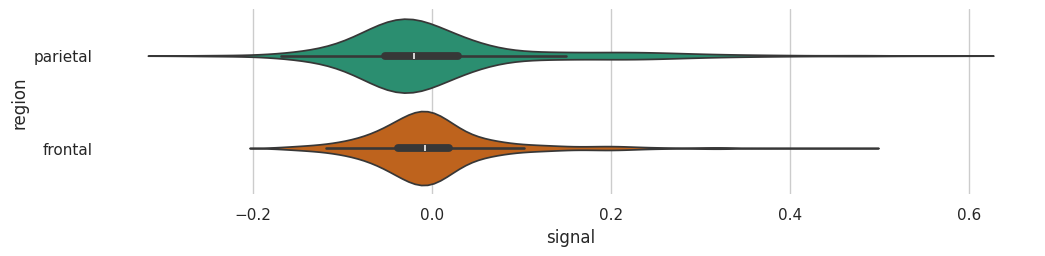

In [99]:
# @title region vs signal

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(fmri['region'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(fmri, x='signal', y='region', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

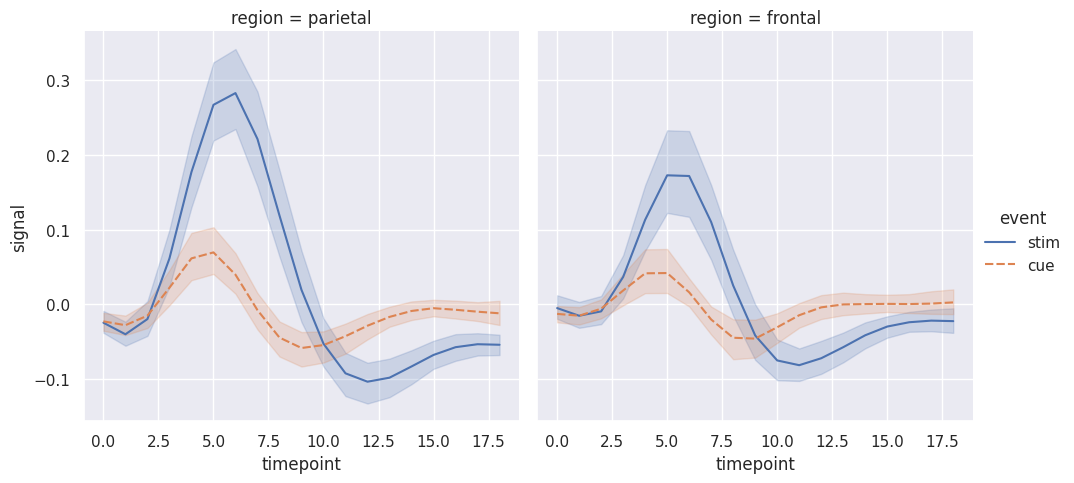

In [102]:
fmri = sns.load_dataset("fmri")
sns.set_theme()
sns.relplot(
    data=fmri,
    kind="line",
    x="timepoint",
    y="signal",
    col="region",
    hue="event",
    style="event",
)

La estimación estadística en Seaborn va más allá de las estadísticas descriptivas. Por ejemplo, es posible mejorar un diagrama de dispersión al incluir un modelo de regresión lineal (y su incertidumbre) utilizando `lmplot()`:

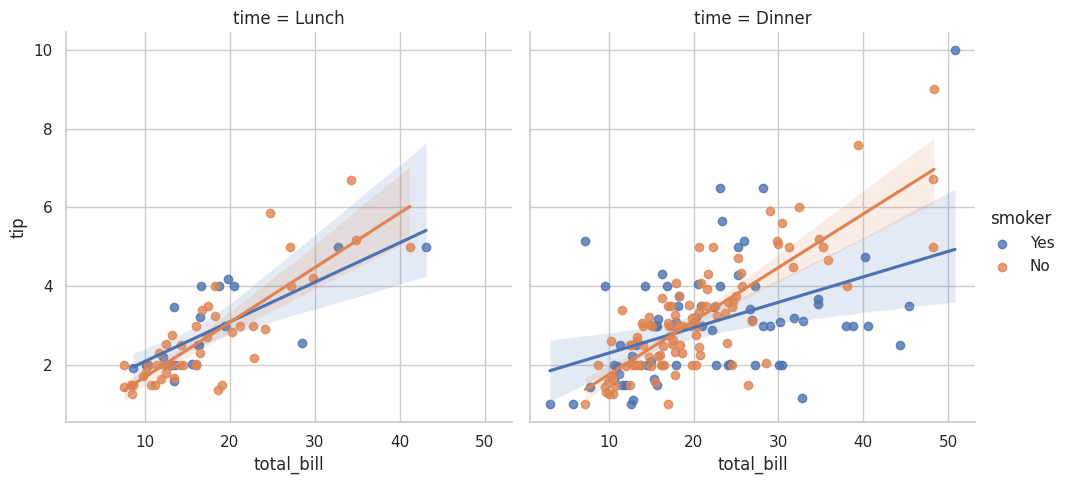

In [109]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

## Representaciones distribucionales

Los análisis estadísticos requieren conocimientos sobre la distribución de las variables en el conjunto de datos. La función `displot()` de Seaborn admite varios enfoques para visualizar distribuciones. Estos incluyen técnicas clásicas como histogramas y enfoques que requieren un uso intensivo de recursos computacionales como la estimación de densidad kernel:

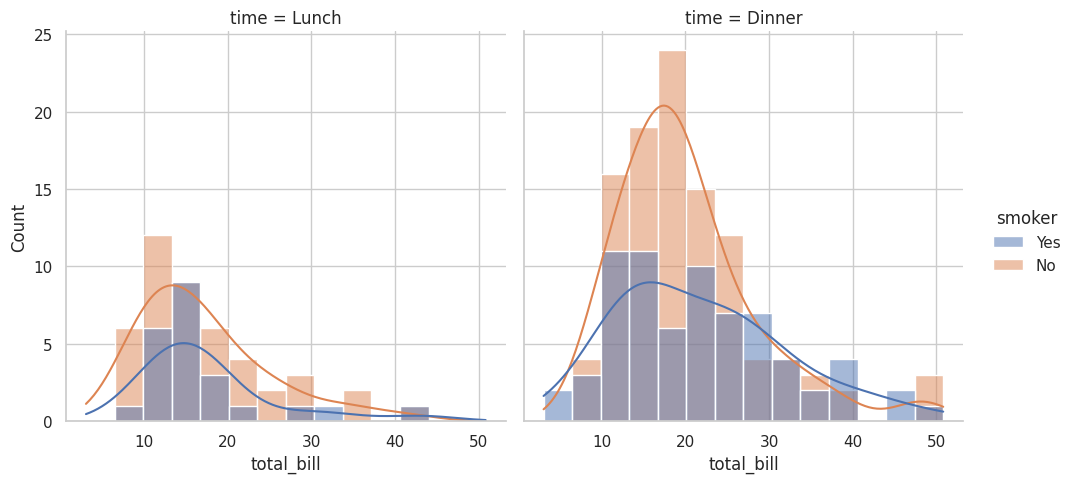

In [117]:
sns.displot(data=tips, x="total_bill", kde=True,  col="time", hue='smoker')

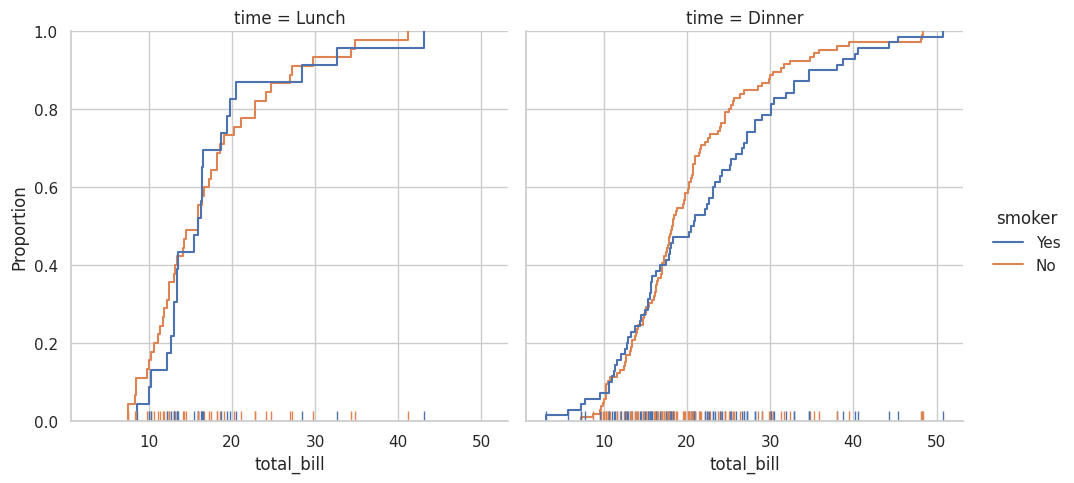

In [118]:
sns.displot(data=tips, kind="ecdf", x="total_bill", col="time", hue="smoker", rug=True)

## Gráficos para datos categóricos

En seaborn existen varios tipos de gráficos especializados orientados a la visualización de datos categóricos. Se puede acceder a ellos a través de `catplot()`. Estos gráficos ofrecen distintos niveles de granularidad. En el nivel más fino, es posible que desee ver cada observación dibujando un gráfico de "enjambre": un gráfico de dispersión que ajusta las posiciones de los puntos a lo largo del eje categórico para que no se superpongan:

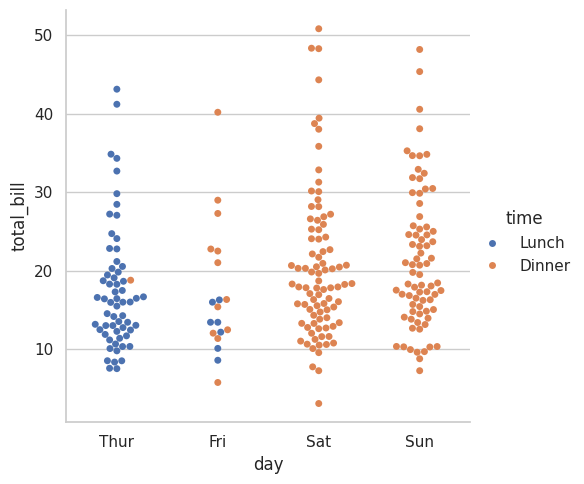

In [121]:
sns.catplot(data=tips, kind='swarm', x="day", y="total_bill", hue="time")

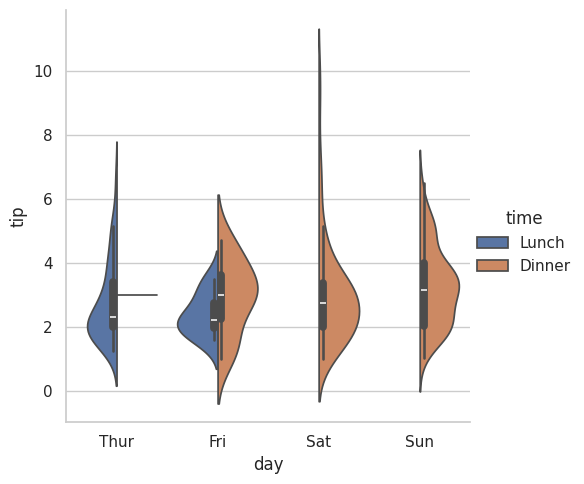

In [122]:
sns.catplot(data=tips, kind="violin", x="day", y="tip", hue="time", split=True)

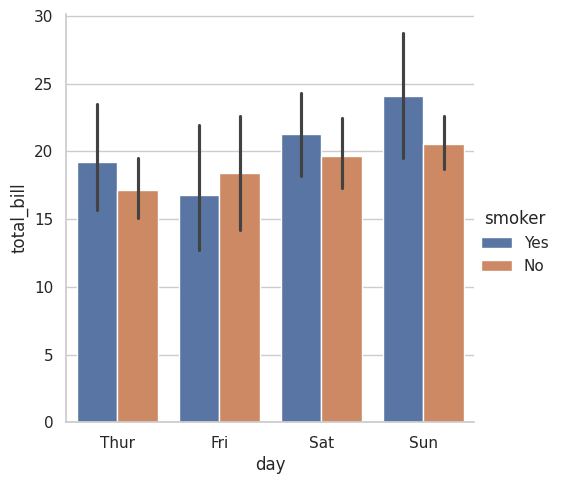

In [123]:
sns.catplot(data=tips, kind="bar", x="day", y="total_bill", hue="smoker")

<Axes: xlabel='day', ylabel='tip'>

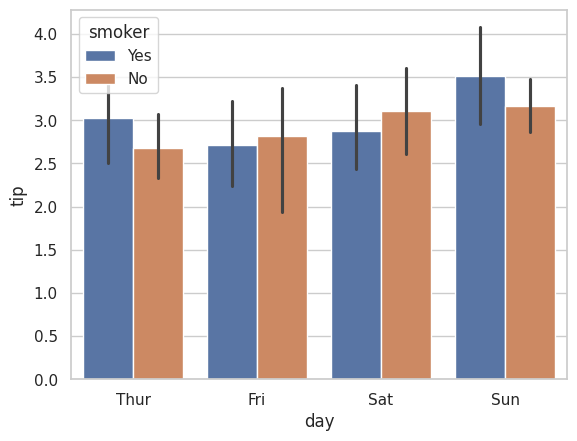

In [124]:
sns.barplot(data=tips, x="day", y="tip", hue="smoker")

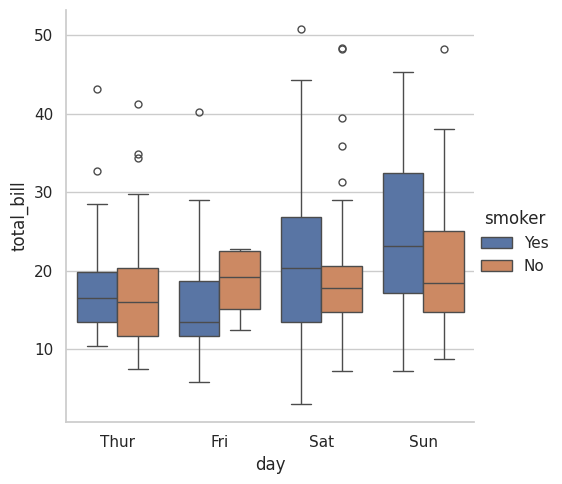

In [125]:
sns.catplot(data=tips, kind="box", x="day", y="total_bill", hue="smoker")

<Axes: xlabel='day', ylabel='total_bill'>

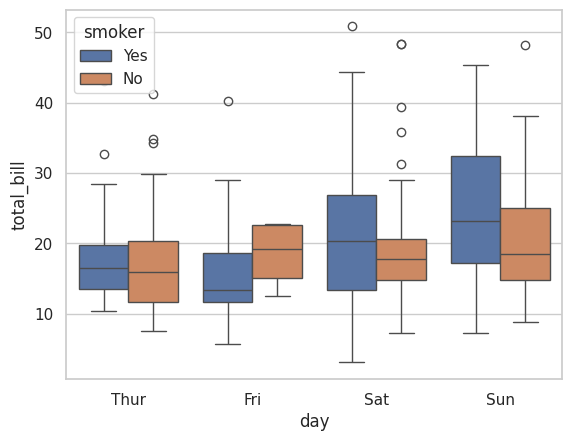

In [126]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="smoker")

### Vistas multivariadas de conjuntos de datos complejos

Algunas funciones de Seaborn combinan varios tipos de gráficos para ofrecer rápidamente resúmenes informativos de un conjunto de datos. Una de ellas, `jointplot()`, se centra en una única relación. Grafica la distribución conjunta entre dos variables junto con la distribución marginal de cada variable:

In [127]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


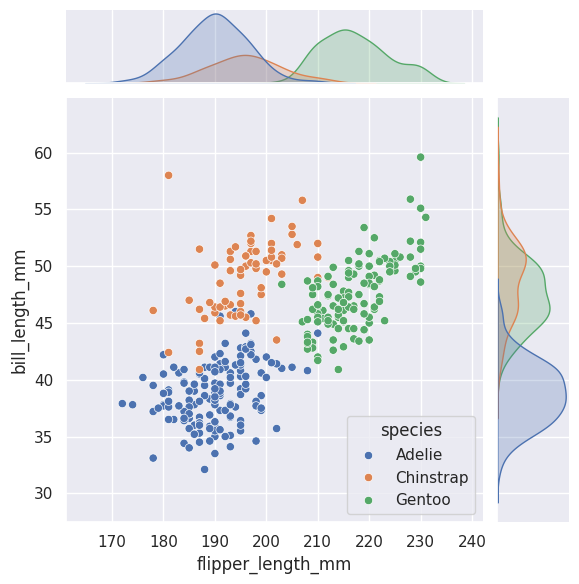

In [129]:
sns.set_theme()
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species")

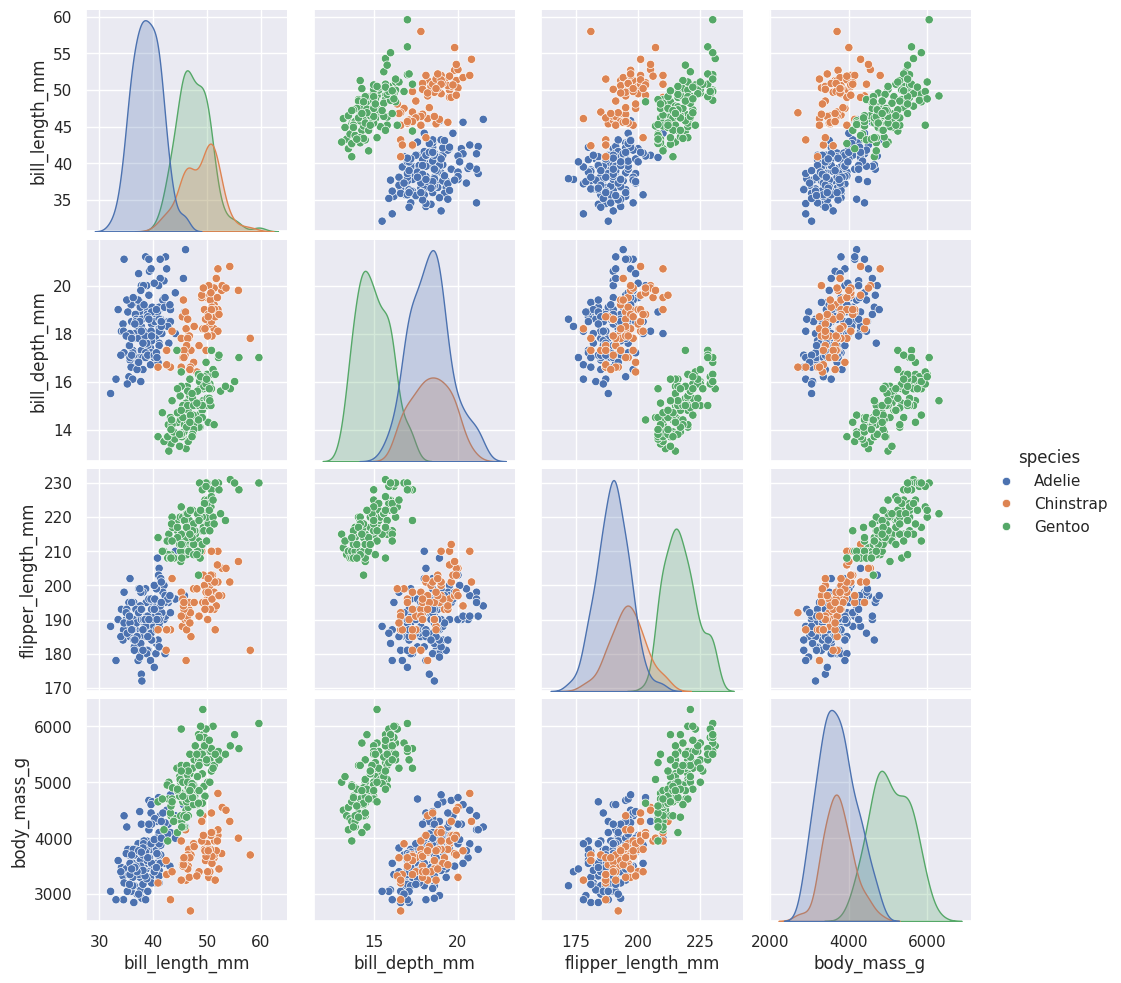

In [131]:
sns.pairplot(data=penguins, hue="species",corner=False)

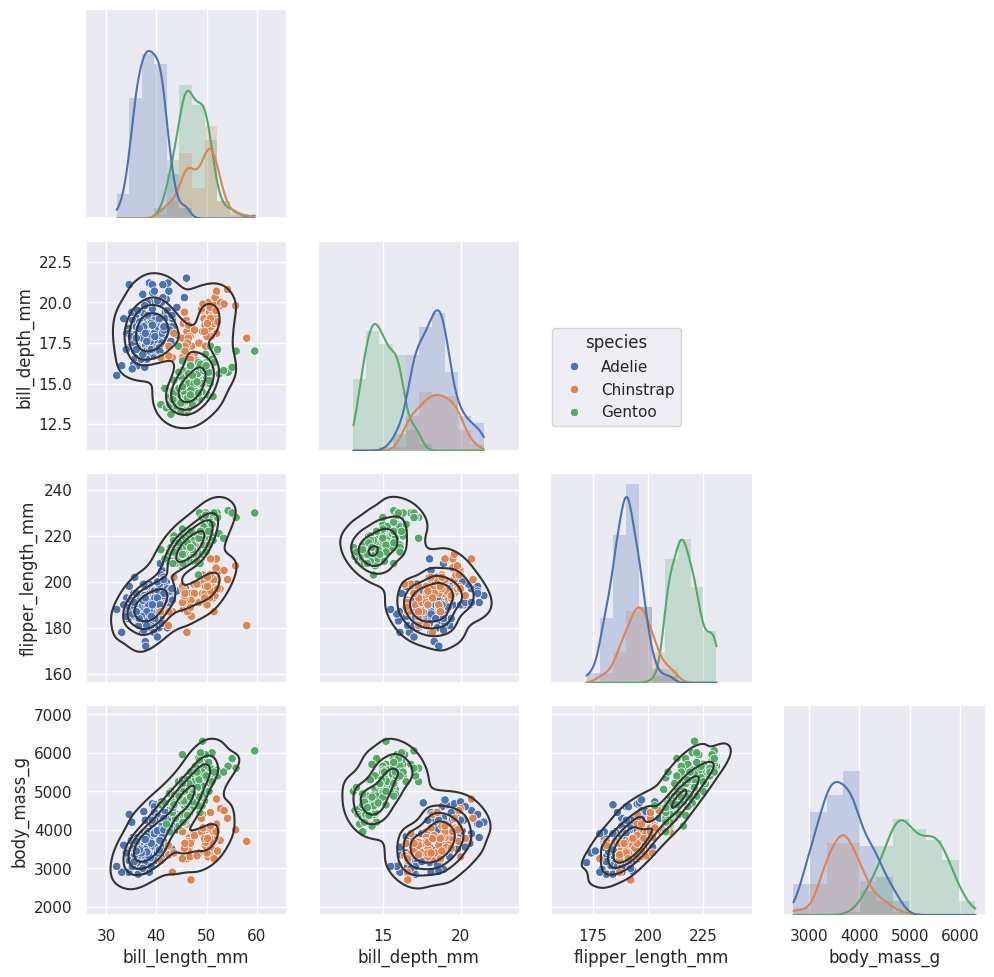

In [136]:
g = sns.PairGrid(penguins, hue="species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="o")
#g.map_upper(sns.boxenplot)
g.map_diag(sns.histplot, element="step", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# `plotly`

Plotly es una librería de Python de código abierto que permite crear visualizaciones interactivas de alta calidad. Es una herramienta poderosa para explorar y comunicar datos de forma efectiva.

### Módulos principales

`plotly.express`: Módulo de alto nivel para crear gráficos rápidamente con una sintaxis simple.

`plotly.graph_objects`: Módulo de bajo nivel para un control más preciso de los elementos del gráfico.

### Tipos de gráficos

Plotly soporta una gran variedad de gráficos, incluyendo:

* Gráficos de dispersión
* Gráficos de líneas
* Gráficos de barras
* Histogramas
* Mapas de calor
* Gráficos 3D

Ejemplo básico con plotly.express

In [137]:
import plotly.express as px
import plotly.graph_objects as go

In [138]:
fig = px.line(x=["a","b","c"], y=[1,3,2], title="sample figure")
#print(fig)
fig.show()

In [139]:
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [140]:
df = px.data.iris()

fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species")
fig.show()

* Iris dataframe

In [141]:
df = px.data.iris()

Gráfico de dispersión generado con plotly

In [142]:
fig = px.scatter(df, x="sepal_length", y="sepal_width", color="species",
                title="Automatic Labels Based on Data Frame Column Names")
fig.show()

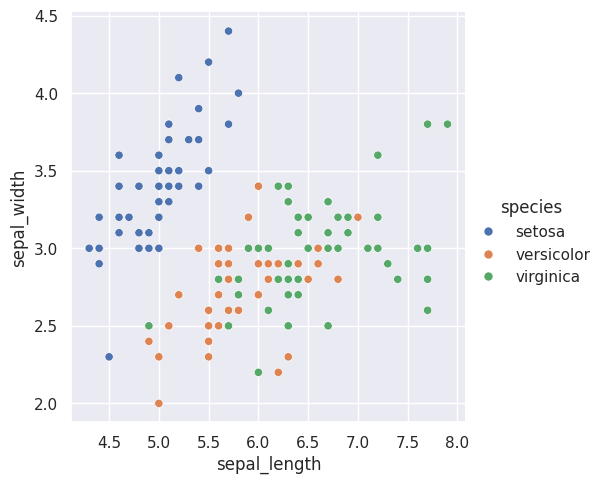

In [145]:
sns.set_theme()
sns.relplot(df, x="sepal_length", y="sepal_width", kind = 'scatter', hue="species")

### Gráfico de líneas

Este código genera un gráfico de líneas que muestra la esperanza de vida a lo largo del tiempo para los países de Oceanía. `px.line` crea el gráfico de líneas. Los argumentos `x` e `y` especifican las columnas del dataframe que se usarán para los ejes. El argumento `color` especifica que se deben usar diferentes colores para diferentes países.

In [146]:
df = px.data.gapminder().query("continent=='Oceania'")

fig = px.line(df, x="year", y="lifeExp", color="country")
fig.show()

### Gráfico de barras

Este código crea un gráfico de barras que compara la factura total entre sexos y fumadores. `px.bar` crea el gráfico de barras. Los argumentos `x` e `y` especifican las columnas a usar para los ejes. El argumento color especifica que se deben usar diferentes colores para fumadores y no fumadores.


In [147]:
df = px.data.tips()

fig = px.bar(df, x="sex", y="total_bill", color="smoker")
fig.show()

### Histograma

 Este código crea un histograma de la factura total. `px.histogram` crea el histograma. El argumento `x` especifica la columna a usar para el histograma. El argumento nbins especifica el número de bins a usar.


In [151]:
fig = px.histogram(df, x="total_bill")
fig.show()

### Mapa de calor
Este código crea una matriz de dispersión con histogramas y mapas de calor para las diferentes dimensiones de la flor Iris.

In [152]:
df = px.data.iris()

fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species")
fig.show()

In [43]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'species_id'],
      dtype='object')

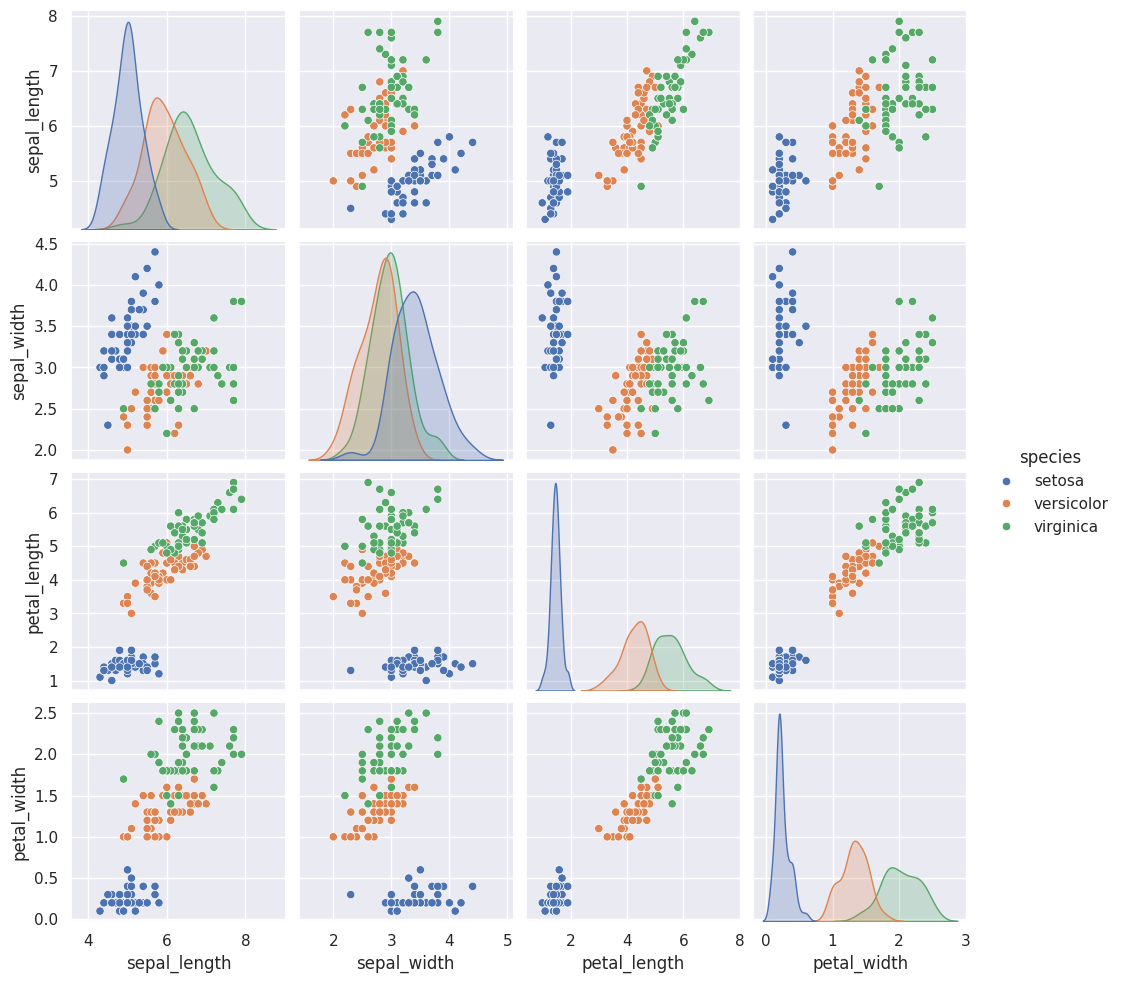

In [153]:
sns.pairplot(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']], hue="species")

## Algunos gráficos de mayor complejidad

*  Funnel Chart

In [154]:
stages = ["Visitantes", "Descargas", "Suscripciones", "Compras"]
values = [300, 150, 50, 20]

fig = px.funnel(x=values, y=stages)
fig.show()

* Gráfico de Sankey

In [155]:
import plotly.graph_objects as go

source = [0, 1, 0, 2, 3, 3]
target = [2, 3, 3, 4, 4, 5]
value = [8, 4, 2, 8, 4, 2]

# data to dict, dict to sankey
link = dict(source = source, target = target, value = value)
node = dict(pad = 15, thickness = 20, line = dict(color = "black", width = 0.5),
            label = ["A1", "A2", "B1", "B2", "C1", "C2"],
            color = "blue")
data = go.Sankey(link = link, node = node)

# plot
fig = go.Figure(data)
fig.show()

* Gráfico de contorno

In [156]:
fig = go.Figure(data =
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    ))
fig.show()